In [3]:
import pandas as pd
from pandas_profiling import ProfileReport
import ydata_profiling
import sketch
# Import the SimpleImputer class from the sklearn.impute module
from sklearn.impute import SimpleImputer

%matplotlib inline

C:\Users\AMIT\AppData\Local\Temp\ipykernel_10560\710236898.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
df = pd.read_csv('abnbuklistings.csv')

In [5]:
design_report = ProfileReport(df)
design_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2260 non-null   int64  
 1   name                            2260 non-null   object 
 2   host_id                         2260 non-null   int64  
 3   host_name                       2260 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   2260 non-null   object 
 6   latitude                        2260 non-null   float64
 7   longitude                       2260 non-null   float64
 8   room_type                       2260 non-null   object 
 9   price                           2260 non-null   int64  
 10  minimum_nights                  2260 non-null   int64  
 11  number_of_reviews               2260 non-null   int64  
 12  last_review                     19

In [7]:
# drop neighbourhood_group column since it has no values

# Check if the 'neighbourhood_group' column exists in the DataFrame
if 'neighbourhood_group' in df.columns:
    # Drop the 'neighbourhood_group' column
    df.drop('neighbourhood_group', axis=1, inplace=True)
    # Print the updated DataFrame to verify that the column was dropped
    print("The 'neighbourhood_group' column was dropped successfully.\n")
else:
    print("The 'neighbourhood_group' column seems to be already dropped.\n")

The 'neighbourhood_group' column was dropped successfully.



In [8]:
# drop neighbourhood_group column since it has no values

# Check if the 'neighbourhood_group' column exists in the DataFrame
if 'license' in df.columns:
    # Drop the 'neighbourhood_group' column
    df.drop('license', axis=1, inplace=True)
    # Print the updated DataFrame to verify that the column was dropped
    print("The 'license' column was dropped successfully.\n")
else:
    print("The 'license' column seems to be already dropped.\n")

The 'license' column was dropped successfully.



In [9]:

# Convert the 'last_review' column to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

# Print the data types of the columns to verify that the 'last_review' column is now a datetime type
print(df.dtypes)

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
dtype: object


In [10]:
df.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,70820,City View - Sarah's double room.,360195,Sarah,Windmill Hill,51.43994,-2.59173,Private room,41,3,179,2022-09-22,1.60,5,0,19
1,117122,City Centre-Waterside Retreat,591555,Marcus,Clifton,51.45051,-2.61054,Private room,96,1,172,2022-12-11,1.23,1,357,18


In [11]:
# Check if there are any missing values in 'last_review' column
if df['last_review'].isnull().sum() == 0:
    print("There are no missing values in 'last_review' column")
else:
    print("There are still missing values in 'last_review' column")

There are still missing values in 'last_review' column


In [12]:

# Create an instance of the SimpleImputer class with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the 'last_review' column and transform the data
df['last_review'] = imputer.fit_transform(df[['last_review']])

In [13]:
# Test the code by checking if there are any missing values in 'last_review' column
assert df['last_review'].isnull().sum() == 0

In [14]:
# Check if there are any missing values in 'last_review' column
if df['last_review'].isnull().sum() == 0:
    print("There are no missing values in 'last_review' column")
else:
    print("There are still missing values in 'last_review' column")

There are no missing values in 'last_review' column


In [15]:
# Check if there are any missing values in 'last_review' column
if df['reviews_per_month'].isnull().sum() == 0:
    print("There are no missing values in 'reviews_per_month' column")
else:
    print("There are still missing values in 'reviews_per_month' column")

There are still missing values in 'reviews_per_month' column


In [16]:
# Calculate the mean of non-missing values in the reviews_per_month column
mean_reviews_per_month = df['reviews_per_month'].mean()

# Replace missing values with the mean value
df['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)

In [17]:
# Check if there are any missing values in 'last_review' column
if df['reviews_per_month'].isnull().sum() == 0:
    print("There are no missing values in 'reviews_per_month' column")
else:
    print("There are still missing values in 'reviews_per_month' column")

There are no missing values in 'reviews_per_month' column


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2260 non-null   int64  
 1   name                            2260 non-null   object 
 2   host_id                         2260 non-null   int64  
 3   host_name                       2260 non-null   object 
 4   neighbourhood                   2260 non-null   object 
 5   latitude                        2260 non-null   float64
 6   longitude                       2260 non-null   float64
 7   room_type                       2260 non-null   object 
 8   price                           2260 non-null   int64  
 9   minimum_nights                  2260 non-null   int64  
 10  number_of_reviews               2260 non-null   int64  
 11  last_review                     2260 non-null   float64
 12  reviews_per_month               22

In [19]:
avg_price_by_neighbourhood = df.groupby('neighbourhood')['price'].mean().reset_index()
print(avg_price_by_neighbourhood)


                  neighbourhood       price
0                        Ashley  120.178832
1   Avonmouth & Lawrence Weston  111.212766
2                    Bedminster   93.240741
3      Bishopston & Ashley Down  177.621212
4                  Bishopsworth   78.416667
5              Brislington East  117.600000
6              Brislington West  115.702128
7                       Central  497.527197
8                       Clifton  137.129870
9                  Clifton Down  117.682119
10                       Cotham  150.101852
11                       Easton   91.326531
12                    Eastville   91.011765
13                      Filwood   61.846154
14                   Frome Vale   64.451613
15       Hartcliffe & Withywood   64.333333
16            Henbury & Brentry  113.555556
17   Hengrove & Whitchurch Park   65.150000
18                   Hillfields   92.733333
19                     Horfield  164.250000
20       Hotwells & Harbourside  171.842857
21                       Knowle 

Question 2: What is the most common room type and its percentage in the dataset?

In [20]:
room_type_counts = df['room_type'].value_counts(normalize=True)
most_common_room_type = room_type_counts.index[0]
percentage = round(room_type_counts[0]*100,2)

print("Most common room type is", most_common_room_type, "which makes up", percentage, "% of the dataset.")


Most common room type is Entire home/apt which makes up 63.41 % of the dataset.


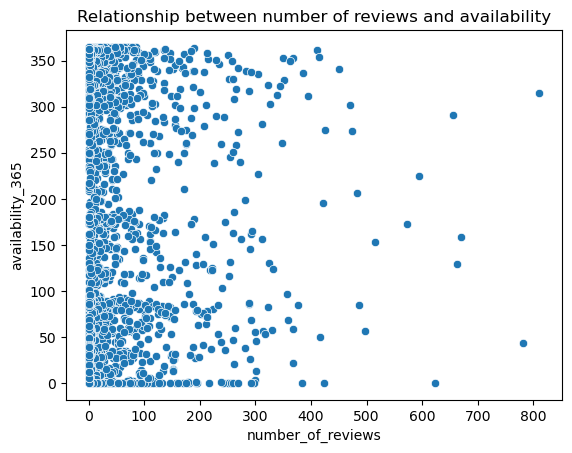

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='number_of_reviews', y='availability_365', data=df)
plt.title('Relationship between number of reviews and availability')
plt.show()


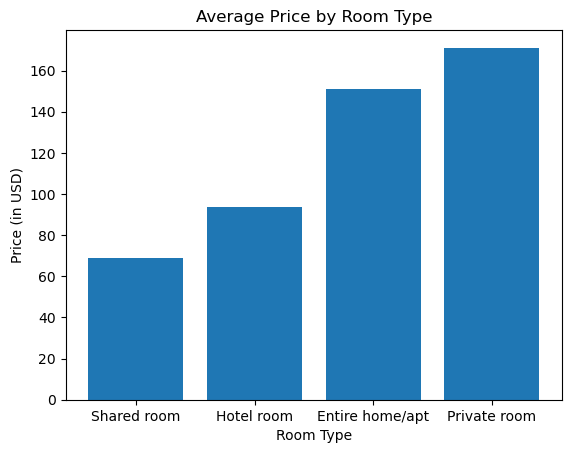

room_type
Shared room         69.000000
Hotel room          93.750000
Entire home/apt    151.265876
Private room       171.145679
Name: price, dtype: float64


In [22]:
# Find the average price per room type
avg_price_by_room_type = df.groupby('room_type')['price'].mean().sort_values()

# Create a bar plot to visualize the results
plt.bar(avg_price_by_room_type.index, avg_price_by_room_type.values)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (in USD)')
plt.show()

# Print the average price by room type
print(avg_price_by_room_type)

In [23]:
# Group by neighbourhood and calculate the mean price
neighbourhood_prices = df.groupby('neighbourhood')['price'].mean()

# Sort the neighbourhoods by average price in descending order and take top 10
top_neighbourhoods = neighbourhood_prices.sort_values(ascending=False).head(10)

# Print the top 10 neighbourhoods and their average price
print(top_neighbourhoods)


neighbourhood
Central                     497.527197
Stoke Bishop                198.888889
Bishopston & Ashley Down    177.621212
Hotwells & Harbourside      171.842857
Horfield                    164.250000
Cotham                      150.101852
Clifton                     137.129870
Redland                     128.358025
Windmill Hill               124.197674
Ashley                      120.178832
Name: price, dtype: float64


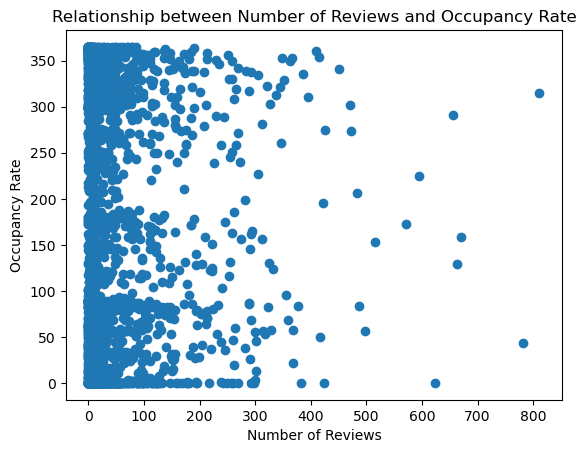

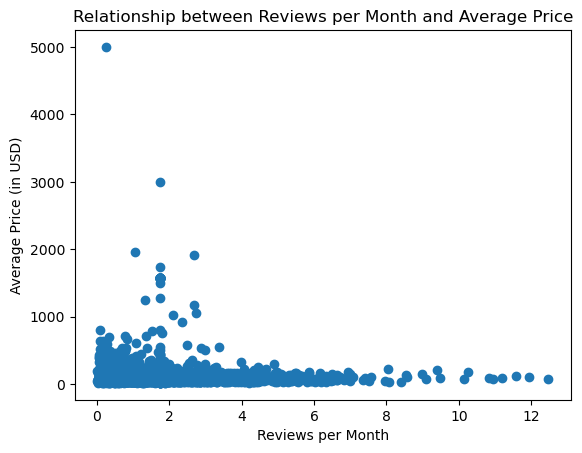

In [24]:
# Create a scatter plot to visualize the relationship between number_of_reviews and occupancy rate
plt.scatter(df['number_of_reviews'], df['availability_365'])
plt.title('Relationship between Number of Reviews and Occupancy Rate')
plt.xlabel('Number of Reviews')
plt.ylabel('Occupancy Rate')
plt.show()

# Create a scatter plot to visualize the relationship between reviews_per_month and average price
plt.scatter(df['reviews_per_month'], df['price'])
plt.title('Relationship between Reviews per Month and Average Price')
plt.xlabel('Reviews per Month')
plt.ylabel('Average Price (in USD)')
plt.show()
